In [21]:
from dataloader import KERCVideoDataset
from dataloader import KERCVideoLoader
from augmentation import train_aug

import numpy as np
from time import time
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch

from modeling import get_VisionConvLSTM

import pytorch_lightning as pl

from tqdm import notebook
import mipkit

In [2]:
model_path = '/home/congvm/Workspace/CNU2020/Research/emotion/source/KERC2020/lightning_logs/version_21/checkpoints/epoch=76.ckpt'

In [3]:
val_data = KERCVideoDataset(data_dir='/home/congvm/Dataset/', 
                              csv_path='/home/congvm/Dataset/dataset/valid_faces.csv',
                              video_length=68,
                              padding_mode='left', 
                              transforms=train_aug(image_size=96))

  8%|▊         | 24/300 [00:00<00:01, 234.27it/s]

Preparing video for KERC Video Dataset!


100%|██████████| 300/300 [00:01<00:00, 263.39it/s]


In [4]:
data_loader = KERCVideoLoader(test_dataset=val_data,
                              batch_size=1,
                              num_workers=4)

In [11]:
model = get_VisionConvLSTM().to('cpu')
# model = pl.LightningModule.load_from_checkpoint(model_path)

In [47]:
model_state_dict = torch.load(model_path)
model.load_state_dict(model_state_dict['state_dict'])

model.eval()

VisionRNNModel(
  (rnn_model): ConvLSTM(
    (cell_list): ModuleList(
      (0): ConvLSTMCell(
        (backbone): Sequential(
          (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
          (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
          (4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (6): ReLU()
          (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
          (8): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (10): ReLU()
          (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
        )
        (conv): Conv2d(68, 16, kernel_size=(3, 3), stride=(1, 1), p

In [7]:
# for data in val_data:
#     break

In [ ]:
# data = np.random.choice(val_data)
results = []
for i, data in notebook.tqdm(enumerate(data_loader.test_dataloader()), total=len(val_data)):
    pred_arousal, pred_valence, pred_stress = model(data['image'])
    pred_arousal, pred_valence, pred_stress = pred_arousal.detach().numpy(), pred_valence.detach().numpy(), pred_stress.detach().numpy()
    
    print(pred_arousal, pred_valence, pred_stress)
    true_arousal = data['arousal'].numpy()
    true_valence = data['valence'].numpy()
    true_stress = data['stress'].numpy()
    
    print('arousal', data['arousal'].numpy())
    print('valence', data['valence'].numpy())
    print('stress', data['stress'].numpy())
    
    results.append({i: {'pred': [pred_arousal, pred_valence, pred_stress], 'gt': [true_arousal, true_valence, true_stress]}})

In [ ]:
results

In [15]:
for i, data in notebook.tqdm(enumerate(data_loader.test_dataloader()), total=len(val_data)):
    break

In [54]:
data = val_data[5]

In [55]:
imgs = data['image'].numpy().transpose((0, 2, 3, 1))

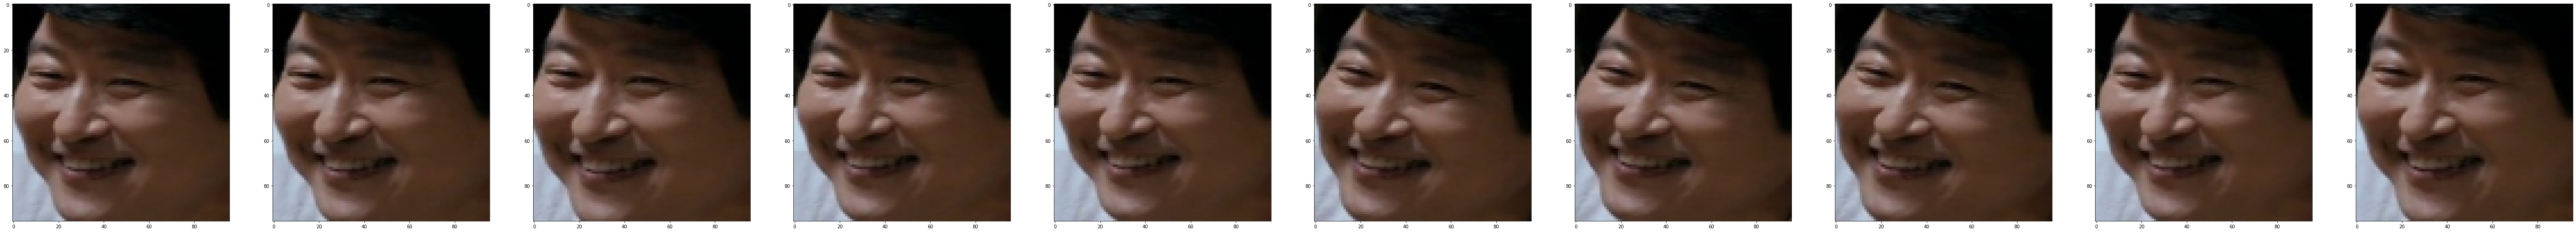

In [56]:
mipkit.show_multi_images(imgs[40:50])

In [57]:
pred_arousal, pred_valence, pred_stress = model(data['image'][np.newaxis])
pred_arousal, pred_valence, pred_stress = pred_arousal.detach().numpy(), pred_valence.detach().numpy(), pred_stress.detach().numpy()
print(pred_arousal, pred_valence, pred_stress)

[[5.500335]] [[6.2059393]] [[3.6973248]]


In [53]:
print('arousal', data['arousal'].numpy())
print('valence', data['valence'].numpy())
print('stress', data['stress'].numpy())


arousal [5.4]
valence [3.1]
stress [6.9]
